In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eda_data = pd.read_csv('scrubbed.csv')
eda_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'enrollee_id', 'city',
       'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'city_id', 'city_dev_perc',
       'experience_lvl', 'company_class'],
      dtype='object')

In [3]:
eda_df = eda_data[['gender', 'relevent_experience','enrolled_university', 'education_level', 'major_discipline', 'company_type', 'last_new_job','training_hours', 'target', 'city_id', 'city_dev_perc','experience_lvl', 'experience','company_class']]

In [4]:
eda_df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,last_new_job,training_hours,target,city_id,city_dev_perc,experience_lvl,experience,company_class
0,1,1,no_enrollment,Graduate,STEM,NaN,1,36,1.0,103,92.0,expert_lvl,>20,unknown
1,1,0,no_enrollment,Graduate,STEM,Pvt Ltd,>4,47,0.0,40,77.6,expert_lvl,15,small_company
2,0,0,Full time course,Graduate,STEM,NaN,0,83,0.0,21,62.4,mid_lvl,5,unknown
3,0,0,NaN,Graduate,Business Degree,Pvt Ltd,0,52,1.0,115,78.9,entry_lvl,<1,unknown
4,1,1,no_enrollment,Masters,STEM,Funded Startup,4,8,0.0,162,76.7,expert_lvl,>20,small_company


## Analisng target distribution


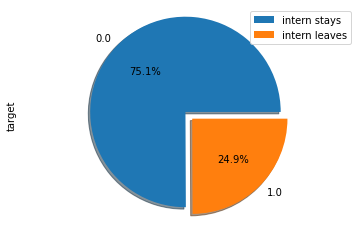

In [5]:
total = eda_df['target'].value_counts()
total.plot.pie(shadow=True, explode=(0,0.1),startangle=0,autopct='%1.1f%%')
labels = ['intern stays','intern leaves']
plt.legend(labels)
plt.axis('equal')
plt.show()


### focusing on interns that stays

In [6]:
intern_stays = eda_df.loc[eda_df['target'] == 0]

In [7]:
bar_chart = intern_stays[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','last_new_job','experience_lvl','company_class']]

#### creating bar chart to analyse each columns

graph for gender: total = 3


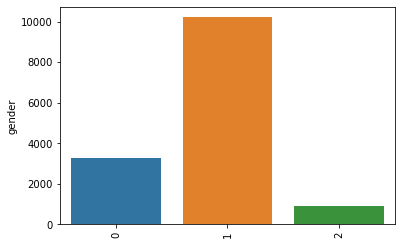

graph for relevent_experience: total = 2


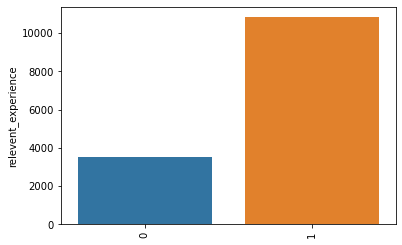

graph for enrolled_university: total = 3


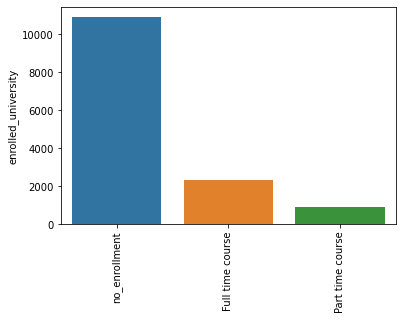

graph for education_level: total = 5


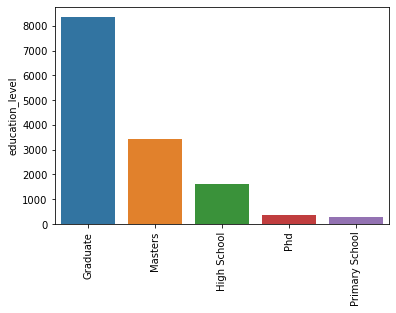

graph for major_discipline: total = 6


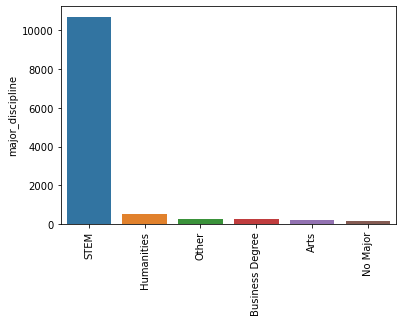

graph for company_type: total = 6


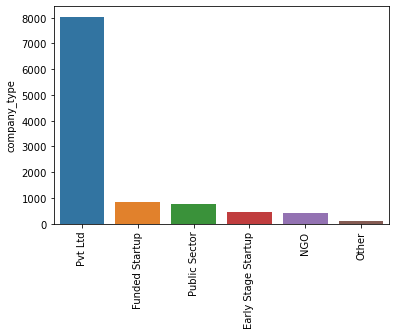

graph for last_new_job: total = 6


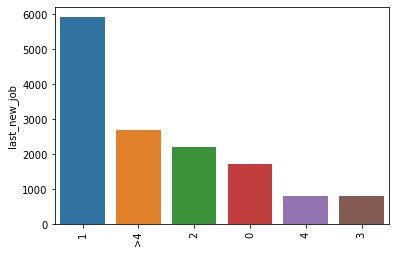

graph for experience_lvl: total = 5


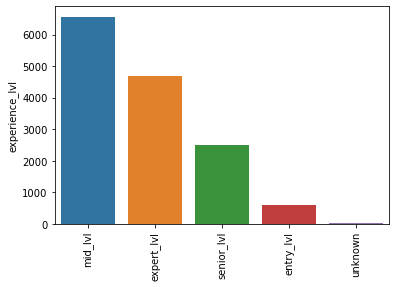

graph for company_class: total = 5


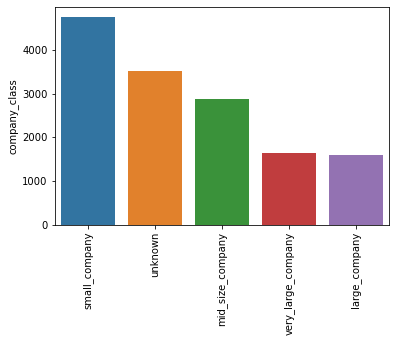

In [8]:
for i in bar_chart.columns:
    num=bar_chart[i].value_counts()
    
    print("graph for %s: total = %d" % (i,len(num)))
    chart = sns.barplot(x=num.index,y=num)
    plt.xticks(rotation=90)
    plt.show()

#### Histograms and boxplots for a better understanding of values

<AxesSubplot:>

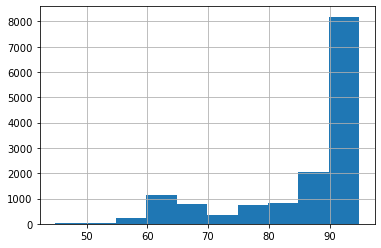

In [9]:
intern_stays.city_dev_perc.hist()

<AxesSubplot:>

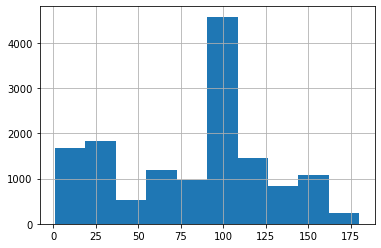

In [10]:
intern_stays.city_id.hist()

In [11]:
intern_stays.city_dev_perc.loc[intern_stays.city_id == 100].value_counts()

88.7    210
Name: city_dev_perc, dtype: int64

<AxesSubplot:>

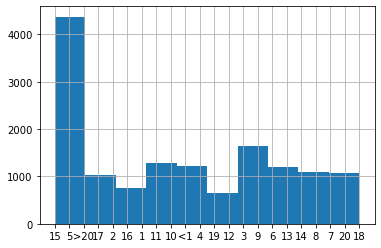

In [12]:
intern_stays.experience.hist()

<AxesSubplot:>

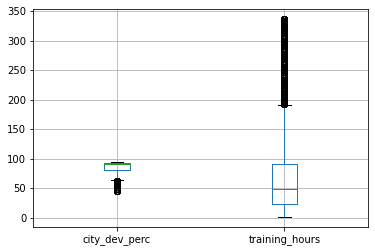

In [59]:
intern_stays.boxplot(column = ['city_dev_perc','training_hours'])

## Pivot Tables

In [13]:
eda_df.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_type', 'last_new_job',
       'training_hours', 'target', 'city_id', 'city_dev_perc',
       'experience_lvl', 'experience', 'company_class'],
      dtype='object')

In [22]:
pd.pivot_table(eda_data, index='target',columns = 'experience_lvl', values='city_dev_perc')

experience_lvl,entry_lvl,expert_lvl,mid_lvl,senior_lvl,unknown
target,,,,,
0.0,79.697837,88.668818,83.081980,86.341099,79.811905
1.0,70.350426,85.424571,72.850126,77.881388,72.178261


In [55]:
pd.pivot_table(eda_data, index=['target','company_class',], values='city_dev_perc')

city_dev_perc
target company_class                    
0.0    large_company           87.166960
       mid_size_company        85.666296
       small_company           85.246768
       unknown                 83.422222
       very_large_company      87.170379
1.0    large_company           76.558278
       mid_size_company        72.842328
       small_company           70.478706
       unknown                 78.726017
       very_large_company      73.798701

In [52]:
pd.pivot_table(eda_data, index=['target','gender',], values='training_hours')

training_hours
target gender                
0.0    0            66.675460
       1            65.853365
       2            67.020833
1.0    0            62.806810
       1            63.414011
       2            61.763804

In [54]:
pd.pivot_table(eda_data, index=['target','company_class',], values='training_hours')

training_hours
target company_class                     
0.0    large_company            64.281938
       mid_size_company         64.199583
       small_company            68.094967
       unknown                  66.521825
       very_large_company       64.630967
1.0    large_company            66.261589
       mid_size_company         63.352734
       small_company            64.045822
       unknown                  62.089627
       very_large_company       64.067532

In [60]:
pd.pivot_table(eda_data, index=['target','major_discipline',], values='training_hours')

training_hours
target major_discipline                
0.0    Arts                   58.780000
       Business Degree        64.497925
       Humanities             67.225379
       No Major               67.714286
       Other                  65.767025
       STEM                   66.126437
1.0    Arts                   65.905660
       Business Degree        70.930233
       Humanities             59.680851
       No Major               48.363636
       Other                  66.823529
       STEM                   62.609338

In [61]:
pd.pivot_table(eda_data, index=['target','education_level',], values='training_hours')

training_hours
target education_level                
0.0    Graduate              66.687059
       High School           66.619840
       Masters               64.073847
       Phd                   68.379213
       Primary School        65.685393
1.0    Graduate              63.421572
       High School           66.931472
       Masters               60.328342
       Phd                   62.275862
       Primary School        50.219512

In [78]:
eda_df

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,last_new_job,training_hours,target,city_id,city_dev_perc,experience_lvl,experience,company_class
0,1,1,no_enrollment,Graduate,STEM,NaN,1,36,1.0,103,92.0,expert_lvl,>20,unknown
1,1,0,no_enrollment,Graduate,STEM,Pvt Ltd,>4,47,0.0,40,77.6,expert_lvl,15,small_company
2,0,0,Full time course,Graduate,STEM,NaN,0,83,0.0,21,62.4,mid_lvl,5,unknown
3,0,0,NaN,Graduate,Business Degree,Pvt Ltd,0,52,1.0,115,78.9,entry_lvl,<1,unknown
4,1,1,no_enrollment,Masters,STEM,Funded Startup,4,8,0.0,162,76.7,expert_lvl,>20,small_company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1,0,no_enrollment,Graduate,Humanities,Public Sector,4,15,NaN,103,92.0,expert_lvl,16,unknown
21283,1,1,no_enrollment,Masters,STEM,NaN,2,30,NaN,136,89.7,expert_lvl,18,unknown
21284,1,0,no_enrollment,Primary School,NaN,Pvt Ltd,0,18,NaN,100,88.7,mid_lvl,3,unknown
21285,1,1,Full time course,High School,NaN,Public Sector,1,84,NaN,102,80.4,mid_lvl,7,mid_size_company


In [80]:
model_df = eda_df.drop(columns = 'experience')

In [82]:
model_df = model_df[model_df['target'].notna()]

In [85]:
model_df.to_csv('model_df.csv')